# 시간대별 노인 교통 사고
- 출처) 도로교통공단.
1. 노인은 65세 이상임
2. 부상자수는 중상자수，경상자수，부상신고자수의 합계.								

### 알 수 있는 것
- Max시간에 노인들이 활동을 시작하는 시간임을 알 수 있음.
- 10시~12시, 14시~16시가 사고 건수 피크 타임 
- 12시~14시(피크타임 사이 시간)에는 항상 감소되어 있음.

- csv 파일에 천 단위로 ','가 있으면 `thousands = ','` 옵션을 추가해서 정수형으로 변환할 때 문제가 생기지 않게 해줘야 함.

In [10]:
import pandas as pd
df = pd.read_csv('data\\hour.csv',  thousands = ',', encoding='CP949',header=1)
df.head()

,시군구,기준년도,합계,0시~2시,2시~4시,4시~6시,6시~8시,8시~10시,10시~12시,12시~14시,...,4시~6시.4,6시~8시.4,8시~10시.4,10시~12시.4,12시~14시.4,14시~16시.4,16시~18시.4,18시~20시.4,20시~22시.4,22시~24시.4
0,합계,사고건수,18904.0,417.0,237.0,526.0,1183.0,2138.0,2759.0,2408.0,...,747.0,1509.0,3020.0,3924.0,3350.0,3898.0,3603.0,2762.0,1443.0,876.0
1,합계,사망자수,139.0,2.0,7.0,23.0,16.0,9.0,17.0,10.0,...,14.0,14.0,5.0,10.0,10.0,14.0,6.0,6.0,8.0,6.0
2,합계,부상자수,20240.0,431.0,236.0,537.0,1238.0,2259.0,2971.0,2615.0,...,778.0,1615.0,3274.0,4294.0,3684.0,4310.0,3965.0,2981.0,1546.0,929.0
3,종로구,사고건수,571.0,18.0,5.0,13.0,32.0,41.0,102.0,83.0,...,21.0,34.0,63.0,108.0,97.0,124.0,126.0,74.0,37.0,29.0
4,종로구,사망자수,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


- pandas drop row by condition

In [2]:
df.drop(df[df['기준년도']=='사망자수'].index, axis = 0, inplace=True)
df.drop(df[df['기준년도']=='부상자수'].index, axis = 0, inplace=True)
df.drop(78, inplace = True)

- pandas.DataFrame.reset_index()
- pandas drop columns

In [3]:
df.reset_index(inplace=True)
df = df.drop('index', axis = 1)

In [4]:
df.info() # 자료형 변환 필요함 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 67 columns):
시군구          26 non-null object
기준년도         26 non-null object
합계           26 non-null float64
0시~2시        26 non-null float64
2시~4시        26 non-null float64
4시~6시        26 non-null float64
6시~8시        26 non-null float64
8시~10시       26 non-null float64
10시~12시      26 non-null float64
12시~14시      26 non-null float64
14시~16시      26 non-null float64
16시~18시      26 non-null float64
18시~20시      26 non-null float64
20시~22시      26 non-null float64
22시~24시      26 non-null float64
합계.1         26 non-null float64
0시~2시.1      26 non-null float64
2시~4시.1      26 non-null float64
4시~6시.1      26 non-null float64
6시~8시.1      26 non-null float64
8시~10시.1     26 non-null float64
10시~12시.1    26 non-null float64
12시~14시.1    26 non-null float64
14시~16시.1    26 non-null float64
16시~18시.1    26 non-null float64
18시~20시.1    26 non-null float64
20시~22시.1    26 non-null float64
22시~24시.

In [5]:
# 다 int형으로 변환
df.loc[:,'합계':'22시~24시.4'].astype('int32').dtypes

합계           int32
0시~2시        int32
2시~4시        int32
4시~6시        int32
6시~8시        int32
8시~10시       int32
10시~12시      int32
12시~14시      int32
14시~16시      int32
16시~18시      int32
18시~20시      int32
20시~22시      int32
22시~24시      int32
합계.1         int32
0시~2시.1      int32
2시~4시.1      int32
4시~6시.1      int32
6시~8시.1      int32
8시~10시.1     int32
10시~12시.1    int32
12시~14시.1    int32
14시~16시.1    int32
16시~18시.1    int32
18시~20시.1    int32
20시~22시.1    int32
22시~24시.1    int32
합계.2         int32
0시~2시.2      int32
2시~4시.2      int32
4시~6시.2      int32
             ...  
16시~18시.2    int32
18시~20시.2    int32
20시~22시.2    int32
22시~24시.2    int32
합계.3         int32
0시~2시.3      int32
2시~4시.3      int32
4시~6시.3      int32
6시~8시.3      int32
8시~10시.3     int32
10시~12시.3    int32
12시~14시.3    int32
14시~16시.3    int32
16시~18시.3    int32
18시~20시.3    int32
20시~22시.3    int32
22시~24시.3    int32
합계.4         int32
0시~2시.4      int32
2시~4시.4      int32
4시~6시.4      int32
6시~8시.4     

In [6]:
# 연도별 데이터 쪼개기 (2015~2019)
df_2015 = df.loc[:,'0시~2시':'22시~24시']
df_2016 = df.loc[:,'0시~2시.1':'22시~24시.1']
df_2017 = df.loc[:,'0시~2시.2':'22시~24시.2']
df_2018 = df.loc[:,'0시~2시.3':'22시~24시.3']
df_2019 = df.loc[:,'0시~2시.4':'22시~24시.4']
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019]

In [11]:
df.head()

,시군구,기준년도,합계,0시~2시,2시~4시,4시~6시,6시~8시,8시~10시,10시~12시,12시~14시,...,4시~6시.4,6시~8시.4,8시~10시.4,10시~12시.4,12시~14시.4,14시~16시.4,16시~18시.4,18시~20시.4,20시~22시.4,22시~24시.4
0,합계,사고건수,18904.0,417.0,237.0,526.0,1183.0,2138.0,2759.0,2408.0,...,747.0,1509.0,3020.0,3924.0,3350.0,3898.0,3603.0,2762.0,1443.0,876.0
1,합계,사망자수,139.0,2.0,7.0,23.0,16.0,9.0,17.0,10.0,...,14.0,14.0,5.0,10.0,10.0,14.0,6.0,6.0,8.0,6.0
2,합계,부상자수,20240.0,431.0,236.0,537.0,1238.0,2259.0,2971.0,2615.0,...,778.0,1615.0,3274.0,4294.0,3684.0,4310.0,3965.0,2981.0,1546.0,929.0
3,종로구,사고건수,571.0,18.0,5.0,13.0,32.0,41.0,102.0,83.0,...,21.0,34.0,63.0,108.0,97.0,124.0,126.0,74.0,37.0,29.0
4,종로구,사망자수,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


강남구
최대 건수 시간대 :  10시~12시
최대 건수 시간대 :  14시~16시.1
최대 건수 시간대 :  10시~12시.2
최대 건수 시간대 :  14시~16시.3
최대 건수 시간대 :  10시~12시.4


<Figure size 432x288 with 0 Axes>

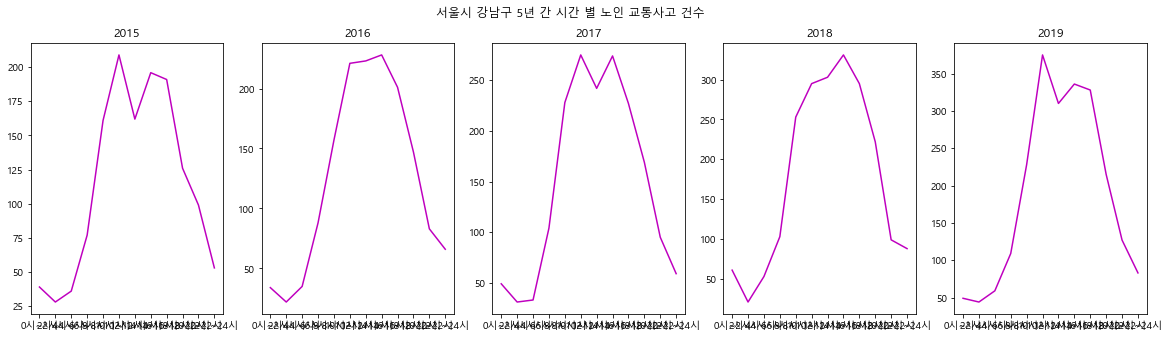

서초구
최대 건수 시간대 :  14시~16시
최대 건수 시간대 :  10시~12시.1
최대 건수 시간대 :  10시~12시.2
최대 건수 시간대 :  14시~16시.3
최대 건수 시간대 :  14시~16시.4


<Figure size 432x288 with 0 Axes>

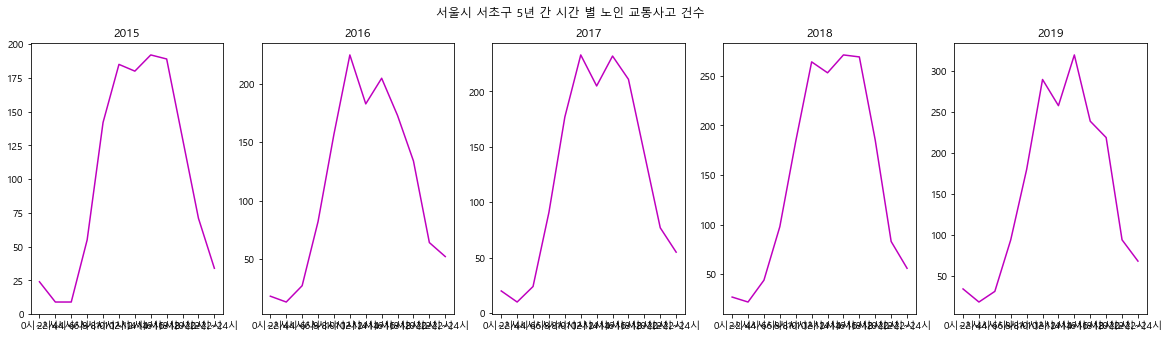

송파구
최대 건수 시간대 :  10시~12시
최대 건수 시간대 :  14시~16시.1
최대 건수 시간대 :  10시~12시.2
최대 건수 시간대 :  10시~12시.3
최대 건수 시간대 :  14시~16시.4


<Figure size 432x288 with 0 Axes>

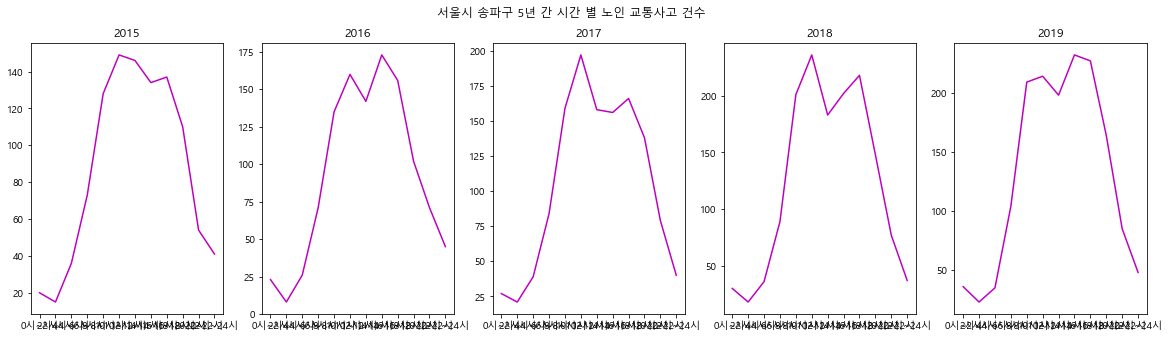

영등포구
최대 건수 시간대 :  14시~16시
최대 건수 시간대 :  14시~16시.1
최대 건수 시간대 :  10시~12시.2
최대 건수 시간대 :  10시~12시.3
최대 건수 시간대 :  16시~18시.4


<Figure size 432x288 with 0 Axes>

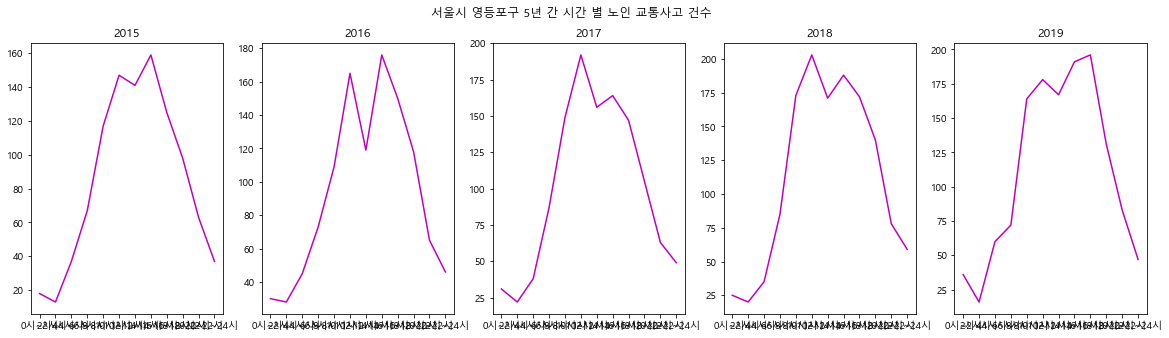

강서구
최대 건수 시간대 :  14시~16시
최대 건수 시간대 :  16시~18시.1
최대 건수 시간대 :  10시~12시.2
최대 건수 시간대 :  16시~18시.3
최대 건수 시간대 :  10시~12시.4


<Figure size 432x288 with 0 Axes>

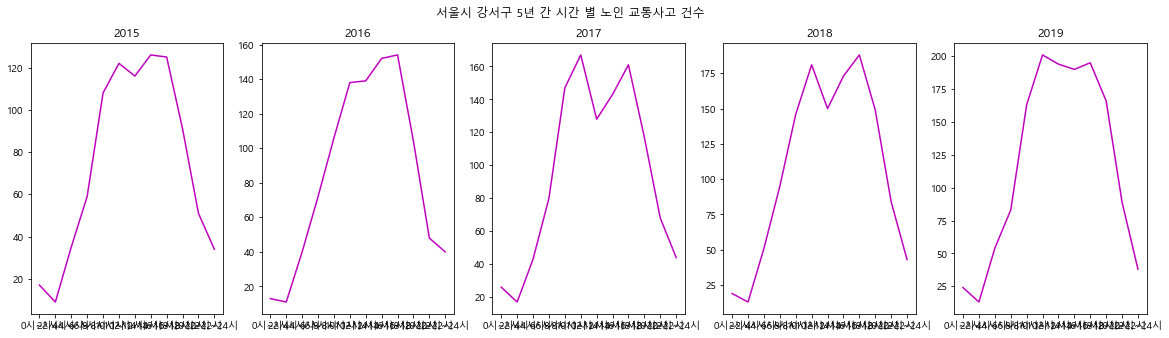

In [9]:
# 근 5년간 사고 건수가 많은 자치구 Top 5 구하기 - month data와 동일해서 가져옴
top5_list = [16, 19, 18, 13, 11]
year_list= [ 2015,2016,2017,2018,2019]
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
index = ['0시~2시', '2시~4시','4시~6시','6시~8시','8시~10시', '10시~12시', '12시~14시','14시~16시','16시~18시','18시~20시', '20시~22시','22시~24시']

for gu in top5_list:
#     print(gu)
    print(df.iloc[gu,0])
    plt.figure()
    plt.figure(figsize=[20,5])
    for i, val in enumerate(year_list):
        plt.subplot(1,5,i+1).set_title(val)
        plt.plot(index, df_list[i].iloc[gu], color='m')
        print('최대 건수 시간대 : ',df_list[i].iloc[gu].idxmax())
    title = '서울시 {} 5년 간 시간 별 노인 교통사고 건수'.format(df.iloc[gu,0])
    plt.suptitle(title)        
    plt.show()